### Project Title

#### Linking EHR Adoption and Hospital Quality at the Facility Level in the United States

### Team Members

#### Haichao Min (haichaom), Yuanyu Lin (Yuanlin)

### Overview

This project explores the relationship between the adoption of specific Electronic Health Record (EHR) technologies and the quality of care in U.S. hospitals. By merging two distinct, facility-level datasets from the Centers for Medicare & Medicaid Services (CMS), we aim to investigate whether hospitals equipped with certified EHR systems demonstrate better performance on key quality and patient outcome metrics. This analysis will provide granular insights into the tangible impact of health technology on healthcare performance.

### Motivation

The widespread adoption of Electronic Health Records (EHRs) is a cornerstone of modern healthcare reform, driven by the promise of improved patient safety, clinical outcomes, and operational efficiency. While the general benefits of digitalization are often cited, a critical question remains: is there measurable evidence at the individual hospital level to support these claims? Specifically, does the choice of a particular EHR technology vendor correlate with better care? Our motivation is to move beyond broad adoption statistics and conduct a precise, facility-level analysis to see if a quantifiable link exists between a hospital's certified EHR system and its public quality ratings.

### 3 Real-World Questions:
1. Do hospitals with a certified EHR system report higher overall quality scores compared to those without a reported system? This fundamental question seeks to validate the primary hypothesis that EHR adoption is positively associated with better care.

2. Is there a discernible difference in quality outcomes among hospitals using different major EHR vendors (e.g., Epic vs. Cerner vs. MEDITECH)? This question aims to uncover whether the choice of technology partner has a measurable impact on hospital performance.

3. Are specific types of hospitals, such as smaller or rural "Critical Access Hospitals," lagging in EHR adoption, and does this correlate with their reported outcomes? This question explores potential disparities in technology access and its consequences for vulnerable patient populations.

### Data Sources

We will be using two complementary, facility-level datasets provided by the U.S. Centers for Medicare & Medicaid Services (CMS).

Hospital General Information

URL: https://data.cms.gov/provider-data/dataset/xubh-q36u

Description: This is our primary dataset for quality outcomes. It contains a comprehensive list of U.S. hospitals and includes their location, type, ownership, and, most importantly, performance on quality metrics like the "Hospital overall rating."

Promoting Interoperability - Hospital

URL: https://data.cms.gov/provider-data/dataset/f4ga-b9gx

Description: This dataset provides crucial information about the specific health information technology used by each hospital. Its key variable is the CEHRT ID, a unique identifier for the certified EHR technology product a hospital uses to participate in federal programs.

How they complement each other:

These datasets are a perfect match for our project. The Hospital General Information dataset provides our dependent variables (the outcomes we want to measure, like quality ratings). The Promoting Interoperability dataset provides our key independent variable (the potential cause we want to investigate, which is the specific EHR technology used). By merging them on their shared Facility ID, we can directly analyze the relationship between technology adoption and quality of care for each individual hospital.



### Data Description

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data
hospital_general_info = pd.read_csv("../data/project_datasets/Hospital_General_Information.csv")
promoting_interoperability = pd.read_csv("../data/project_datasets/Promoting_Interoperability_Hospital.csv")

In [4]:
# Check Hospital General Information data
print("--- 1. Hospital General Information ---")
print(f"Dataset Shape: {hospital_general_info.shape}")
print("\nFirst 5 rows:")
print(hospital_general_info.head())
print("\nData Types and Missing Values:")
hospital_general_info.info()

--- 1. Hospital General Information ---
Dataset Shape: (5381, 38)

First 5 rows:
  Facility ID                    Facility Name                     Address  \
0      010001  SOUTHEAST HEALTH MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1      010005         MARSHALL MEDICAL CENTERS  2505 U S HIGHWAY 431 NORTH   
2      010006     NORTH ALABAMA MEDICAL CENTER         1701 VETERANS DRIVE   
3      010007         MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4      010008      CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

  City/Town State  ZIP Code County/Parish Telephone Number  \
0    DOTHAN    AL     36301       HOUSTON   (334) 793-8701   
1      BOAZ    AL     35957      MARSHALL   (256) 593-8310   
2  FLORENCE    AL     35630    LAUDERDALE   (256) 768-8400   
3       OPP    AL     36467     COVINGTON   (334) 493-3541   
4   LUVERNE    AL     36049      CRENSHAW   (334) 335-3374   

          Hospital Type                           Hospital Ownership  ...  \


### Initial Observations: Hospital General Information (hospital_general_info):

Size: This is our primary dataset, containing 5,381 rows, each representing a unique hospital, and 38 columns of features.

Key Variables: The most important columns for our analysis are `Facility ID` (which will be our key for merging), Hospital overall rating (our main outcome measure), and Hospital Type (for answering our third research question).

Data Quality: A critical observation from the .info() output is that the Hospital overall rating column is an object (text) type, not a number. This is because it contains non-numeric values (like "Not Available"). This column must be cleaned and converted to a numeric type before we can perform any mathematical analysis or create visualizations.

In [5]:
# Check Promoting Interoperability data
print("--- 2. Promoting Interoperability - Hospital ---")
print(f"Dataset Shape: {promoting_interoperability.shape}")
print("\nFirst 5 rows:")
print(promoting_interoperability.head())
print("\nData Types and Missing Values:")
promoting_interoperability.info()

--- 2. Promoting Interoperability - Hospital ---
Dataset Shape: (4591, 12)

First 5 rows:
   Facility ID                    Facility Name                     Address  \
0        10001  SOUTHEAST HEALTH MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005         MARSHALL MEDICAL CENTERS  2505 U S HIGHWAY 431 NORTH   
2        10006     NORTH ALABAMA MEDICAL CENTER         1701 VETERANS DRIVE   
3        10007         MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008      CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

  City/Town State  ZIP Code County/Parish Telephone Number         CEHRT ID  \
0    DOTHAN    AL     36301       HOUSTON   (334) 793-8701  0015CAN28DKT47C   
1      BOAZ    AL     35957      MARSHALL   (256) 593-8310  0015C0HAX4ESQ0D   
2  FLORENCE    AL     35630    LAUDERDALE   (256) 768-8400  0015CW76TRC3SVN   
3       OPP    AL     36467     COVINGTON   (334) 493-3541  0015CFG3Q10HY2V   
4   LUVERNE    AL     36049      CRENSHA

### Initial Observations: Promoting Interoperability (promoting_interoperability):

Size: This dataset contains 4,591 rows and 12 columns.

Key Observation: This dataset has fewer hospitals (4,591) than the main hospital information file (5,381). This is a crucial insight: it tells us that not every hospital reports its EHR technology information through this program. Our left merge strategy will be important to keep all hospitals in the final dataset.

Key Variables: The essential columns are Facility ID (for merging) and CEHRT ID (the unique identifier for the EHR technology used by the hospital).

Data Quality: The dataset appears relatively clean, with most columns showing non-null values. The CEHRT ID is the central piece of information we will extract from this file to identify a hospital's technology vendor.

### Data Manipulation

In [6]:
# Merge the two datasets on Facility ID
hospital_general_info['Facility ID'] = hospital_general_info['Facility ID'].astype(str)
promoting_interoperability['Facility ID'] = promoting_interoperability['Facility ID'].astype(str)

merged_df = pd.merge(
    hospital_general_info,
    promoting_interoperability,
    on='Facility ID',
    how='left'
)
print(f"Merged Dataset Shape: {merged_df.shape}")

Merged Dataset Shape: (5381, 49)


In [7]:
# Clean the Hospital overall rating column
merged_df['rating_numeric'] = pd.to_numeric(merged_df['Hospital overall rating'], errors='coerce')
print(merged_df[['Hospital overall rating', 'rating_numeric']].head(10))

  Hospital overall rating  rating_numeric
0                       4             4.0
1                       3             3.0
2                       2             2.0
3                       1             1.0
4           Not Available             NaN
5                       2             2.0
6                       3             3.0
7                       2             2.0
8           Not Available             NaN
9                       2             2.0


In [8]:
# Engineer the 'EHR_Vendor' feature
print("--- Top 10 Most Common CEHRT IDs ---")
top_ids = merged_df['CEHRT ID'].value_counts().head(5)
print(top_ids)

--- Top 10 Most Common CEHRT IDs ---
CEHRT ID
0015CFG3Q10HY2V    188
0015CWW3R9FPD02    134
0015C4J0ZKW5KKJ    128
0015C622YQ4JDC3    120
0015CHL24QZ8GAF     91
Name: count, dtype: int64


In [9]:
# Match CEHRT IDs to Vendor Names
cehrt_to_vendor = {
    '0015CFG3Q10HY2V': 'TruBridge, Inc.',
    '0015CWW3R9FPD02': 'Epic Systems Corporation',
    '0015C4J0ZKW5KKJ': 'Epic Systems Corporation',
    '0015C622YQ4JDC3': 'VigiLanz Corporation',
    '0015CHL24QZ8GAF': 'Epic Systems Corporation',
}

merged_df['EHR_Vendor'] = merged_df['CEHRT ID'].map(cehrt_to_vendor).fillna('Other')
print(merged_df[['CEHRT ID', 'EHR_Vendor']].value_counts().head(5))

CEHRT ID         EHR_Vendor              
0015CFG3Q10HY2V  TruBridge, Inc.             188
0015CWW3R9FPD02  Epic Systems Corporation    134
0015C4J0ZKW5KKJ  Epic Systems Corporation    128
0015C622YQ4JDC3  VigiLanz Corporation        120
0015CHL24QZ8GAF  Epic Systems Corporation     91
Name: count, dtype: int64


In [10]:
# Create a 'Has EHR' binary feature
merged_df['Has_EHR'] = np.where(merged_df['CEHRT ID'].notna(), 'Yes', 'No')
print(merged_df[['CEHRT ID', 'Has_EHR']].value_counts().head(5))

CEHRT ID         Has_EHR
0015CFG3Q10HY2V  Yes        188
0015CWW3R9FPD02  Yes        134
0015C4J0ZKW5KKJ  Yes        128
0015C622YQ4JDC3  Yes        120
0015CHL24QZ8GAF  Yes         91
Name: count, dtype: int64


In [11]:
# Final check of the merged dataset
display_cols = [
    'Facility ID', 'Facility Name_x', 'State_x', 'Hospital Type',
    'rating_numeric', 'Has_EHR', 'CEHRT ID', 'EHR_Vendor'
]
print(merged_df[display_cols].sample(10, random_state=42))

     Facility ID                                   Facility Name_x State_x  \
705       060015                CENTURA HEALTH-ST ANTHONY HOSPITAL      CO   
2555      241340     ESSENTIA HEALTH NORTHERN PINES MEDICAL CENTER      MN   
2280      220090                   MILFORD REGIONAL MEDICAL CENTER      MA   
2370      230104                        HARPER UNIVERSITY HOSPITAL      MI   
5353      670120  THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS      TX   
3878      380050                          SKY LAKES MEDICAL CENTER      OR   
3614      360156                                 MEMORIAL HOSPITAL      OH   
598       050785                            DOCS SURGICAL HOSPITAL      CA   
2664      250172                     HIGHLAND HILLS MEDICAL CENTER      MS   
1849      171354     COMMUNITY HOSPITAL, ONAGA AND ST MARYS CAMPUS      KS   

                  Hospital Type  rating_numeric Has_EHR         CEHRT ID  \
705        Acute Care Hospitals             4.0      No          

### Data Visualization

          count      mean       std  min  25%  50%  75%  max
Has_EHR                                                     
No        682.0  3.137830  1.162965  1.0  2.0  3.0  4.0  5.0
Yes      2190.0  3.065297  1.079241  1.0  2.0  3.0  4.0  5.0


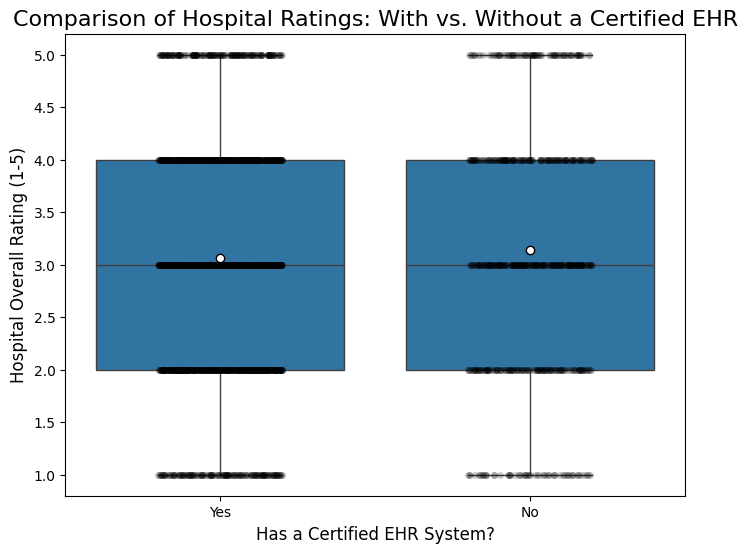

In [12]:
# Question 1: Do hospitals with a certified EHR system report higher overall quality scores compared to those without a reported system? 
rating_summary = merged_df.groupby('Has_EHR')['rating_numeric'].describe()
print(rating_summary)
# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='Has_EHR', y='rating_numeric', order=['Yes', 'No'], showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"})
sns.stripplot(data=merged_df, x='Has_EHR', y='rating_numeric', order=['Yes', 'No'],
              color='black', alpha=0.2, jitter=0.2)
plt.title('Comparison of Hospital Ratings: With vs. Without a Certified EHR', fontsize=16)
plt.xlabel('Has a Certified EHR System?', fontsize=12)
plt.ylabel('Hospital Overall Rating (1-5)', fontsize=12)
plt.show()

#### Explanation:

The boxplot and descriptive statistics show that hospitals with certified EHR systems (n=2190) and those without (n=682) have nearly identical overall quality rating distributions. The median rating is 3 for both groups, with an interquartile range of 2–4. The mean scores are 3.07 (EHR) and 3.14 (No EHR), respectively. These results indicate no meaningful difference in quality scores between hospitals with and without certified EHR systems.

                           count   mean    std  min  25%  50%  75%  max
EHR_Vendor                                                             
Epic Systems Corporation   247.0  3.271  1.026  1.0  3.0  3.0  4.0  5.0
Other                     2474.0  3.082  1.107  1.0  2.0  3.0  4.0  5.0
TruBridge, Inc.             36.0  2.917  1.131  1.0  2.0  3.0  4.0  5.0
VigiLanz Corporation       115.0  2.748  1.007  1.0  2.0  3.0  3.0  5.0


/var/folders/vl/ndj32xcd0lz9c0mb_6dqx4vh0000gn/T/ipykernel_43311/2956090648.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


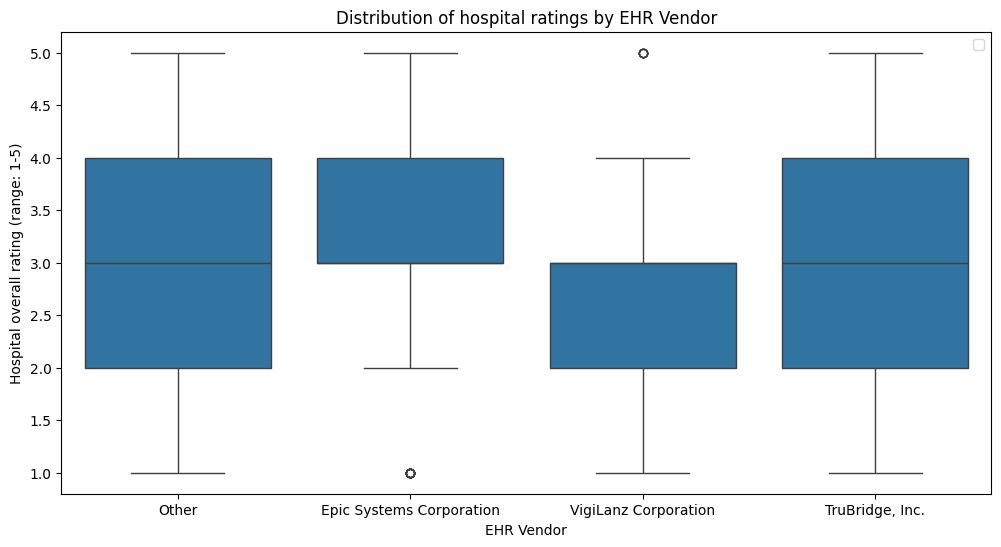

In [13]:
# Question 2: Is there a discernible difference in quality outcomes among hospitals using different major EHR vendors (e.g., Epic vs. Cerner vs. MEDITECH)?
vender_describe = merged_df.groupby('EHR_Vendor')['rating_numeric'].describe().sort_index()
print(vender_describe.round(3))
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='EHR_Vendor', y='rating_numeric')
plt.title('Distribution of hospital ratings by EHR Vendor')
plt.xlabel('EHR Vendor')
plt.ylabel('Hospital overall rating (range: 1-5)')
plt.legend()
plt.show()

#### Explanation:

From the above table, the count for each vendor ranges from 36 to 2474, and the average hospital rating for each vendor ranges from 2.74 to 3.27. Additionally, the standard deviation of each vendor's overall hospital rating ranges from 1.007 to 1.131. 

Based on the boxplots above, the interquartile range of vendors (Epic, VigiLanz) differs from that of the other two vendors. Furthermore, Epic's boxplot shows a lower bound value, while VigiLanz's boxplot has an upper bound value.

/var/folders/vl/ndj32xcd0lz9c0mb_6dqx4vh0000gn/T/ipykernel_43311/3171483992.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
/var/folders/vl/ndj32xcd0lz9c0mb_6dqx4vh0000gn/T/ipykernel_43311/3171483992.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')


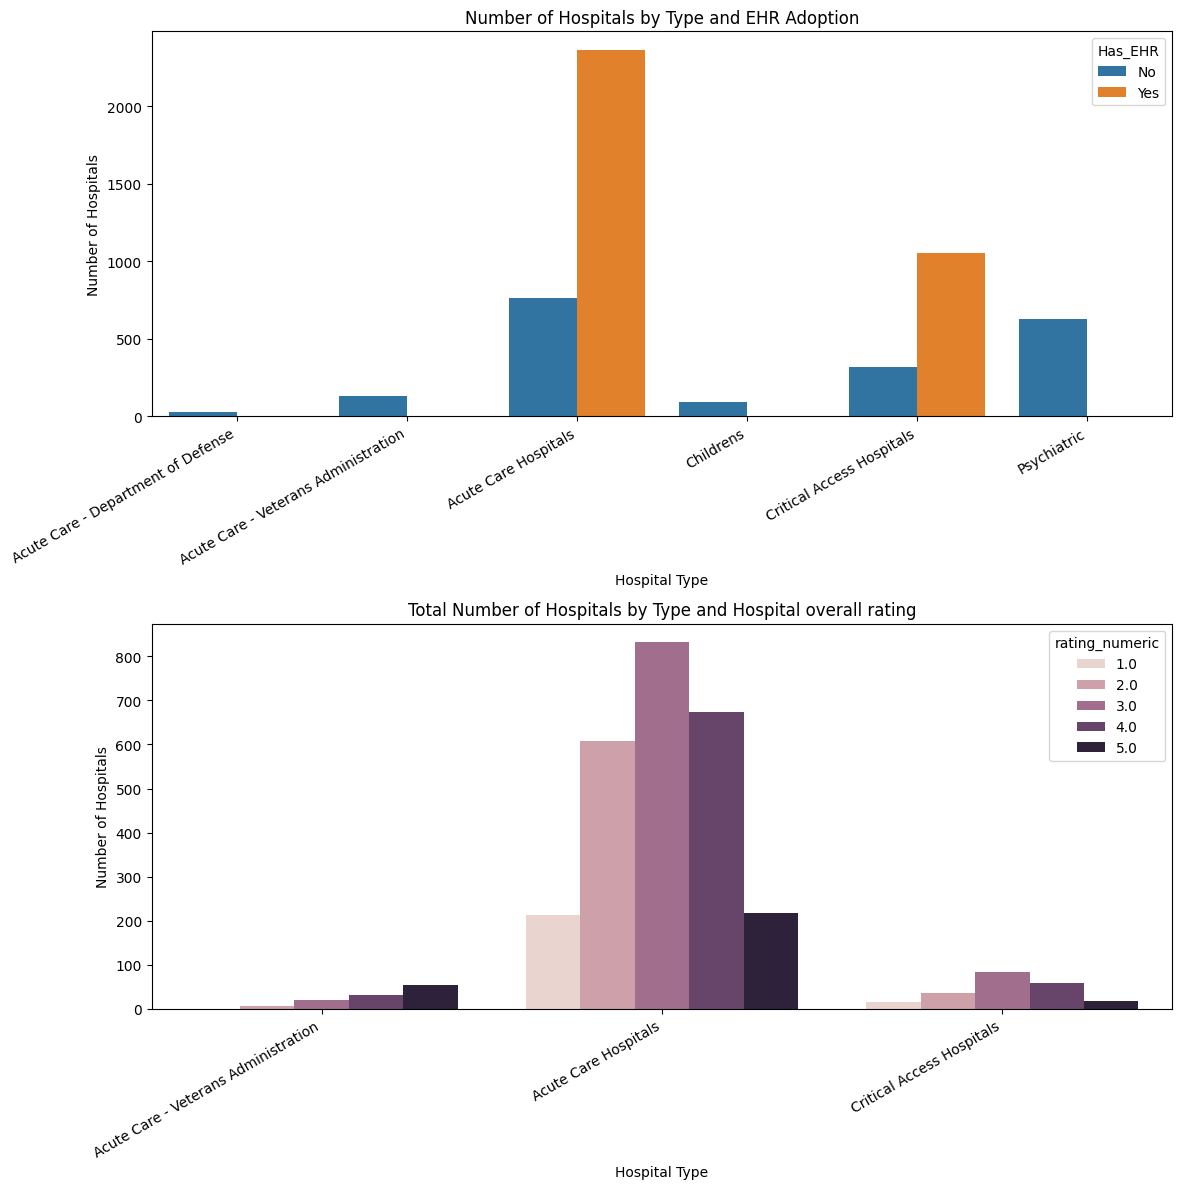

In [14]:
# Question 3: Are specific types of hospitals, such as smaller or rural "Critical Access Hospitals," lagging in EHR adoption, and does this correlate with their reported outcomes?

# hospital counts by type and EHR status
hospital_counts = merged_df.groupby(['Hospital Type', 'Has_EHR']).size().reset_index(name='count')

f, (ax, ax1) = plt.subplots(2, figsize=(12, 12))
sns.barplot(data=hospital_counts, x='Hospital Type', y='count', hue='Has_EHR', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_title('Number of Hospitals by Type and EHR Adoption')
ax.set_ylabel('Number of Hospitals')
ax.set_xlabel('Hospital Type')

# Hospital count by type and hospital overall rating
hospital_rating_counts =merged_df.groupby(['Hospital Type'])['rating_numeric'].\
    value_counts().reset_index(name="count")
sns.barplot(data=hospital_rating_counts, x='Hospital Type', y='count', hue='rating_numeric', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30, ha='right')
ax1.set_title('Total Number of Hospitals by Type and Hospital overall rating')
ax1.set_ylabel('Number of Hospitals')
ax1.set_xlabel('Hospital Type')

plt.tight_layout()
plt.show()

#### Explanation:

According to two histograms, the top two number of hospital which has EHR system are Acute Care Hospital and Critical Access Hospital while the top two hospital without EHR are Acute care Hospital and Pychiatric Hospital. Also, the distribution of hospital overall rating from Acute Care Hospital and Critical Access Hospital seem like bell shape. However, the distribution of hospital overall rating from Acute care -veterans administration is left-skewed distribution. 

In [ ]:
merged_df.to_csv('Project_datasets/clean_df.csv', index=False)